# Рекомендация тарифов


# Описание проекта

Оператор мобильной связи выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».
В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы. Нужно построить модель для задачи классификации, которая выберет подходящий тариф.

 **Наша цель**: построить модель с максимально большим значением `accuracy`. Минимум - 0.75

# План работы

1. Получим файл с данными и изучим общую информацию о них
2. Разделим исходную выборку на обучающую, валидационную и тестовую в соотношени 3:1:1
3. Исследуем качество разных моделей, меняя гиперпараметры. Напишем выводы исследования
4. Проверим качество модели на тестовой выборки
5. Проверим модели на вменяемость

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откройте-и-изучите-файл" data-toc-modified-id="Откройте-и-изучите-файл-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откройте и изучите файл</a></span></li><li><span><a href="#Разбейте-данные-на-выборки" data-toc-modified-id="Разбейте-данные-на-выборки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разбейте данные на выборки</a></span></li><li><span><a href="#Исследуйте-модели" data-toc-modified-id="Исследуйте-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследуйте модели</a></span><ul class="toc-item"><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Проверьте-модель-на-тестовой-выборке" data-toc-modified-id="Проверьте-модель-на-тестовой-выборке-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверьте модель на тестовой выборке</a></span><ul class="toc-item"><li><span><a href="#Проверим-модели-решающего-дерева" data-toc-modified-id="Проверим-модели-решающего-дерева-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Проверим модели решающего дерева</a></span></li></ul></li><li><span><a href="#(бонус)-Проверьте-модели-на-адекватность" data-toc-modified-id="(бонус)-Проверьте-модели-на-адекватность-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>(бонус) Проверьте модели на адекватность</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

----

## Откройте и изучите файл

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression # модель логистической регрессии
from sklearn.tree import DecisionTreeClassifier  # модель решающее дерево
from sklearn.ensemble import RandomForestClassifier # модель случайный лес
from sklearn.model_selection import train_test_split # функция для разделение выборки
from sklearn.metrics import accuracy_score, precision_score, recall_score # функции для оценки модели
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from joblib import dump # функция для сохранения модели
from joblib import load # функция для загрузки модели
from sklearn.model_selection import RandomizedSearchCV # функция для случайного поиска оптимальных гиперпараметров
from sklearn.metrics import confusion_matrix # функция для построения матрицы ошибок
from sklearn.preprocessing import StandardScaler

Считаем данные из файла в датафрейм и сохраним в переменной `df`

Изучим общую информацию

In [3]:
df.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Пропусков нет, проверим на дубликаты

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [7]:
df['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

<font size = 4> Промежуточный вывод </font>
    
- Датафрейм содержит данные о действиях пользователей
- Каждый объект - информация о поведении пользователя за месяц
- В датафрейме содержится информация о:
    + Количестве звонков
    + Суммарной длительности звонков в минутах
    + Количестве сообщений
    + Израсходованном интернет-трафике в мб.
    + Типе тарифа, которым пользовался в течение месяца
- Данных о пользователях с тарифом смарт более чем в 2 раза больше, чем о пользователях с тарифом ультра, отношение двух категорий 1:2, что значит что наша выборка несбалансированна
- Датафрейм предварительно обработан и готов к исследованию

In [8]:
df.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


---

## Разбейте данные на выборки

Объявим две переменные и запишем в них отдельно признаки и целевой признак

Также отбросим данные о звонках в целях избавления от мультиколлинеарности

In [9]:
features = df.drop(['is_ultra', 'calls'], axis=1)
target = df['is_ultra']

Разобьем данные на три выборки: обучающую, валидационную и тестовую в соотношени 3:1:1

Для этого сначала поделим выборку на обучающую и валидационную в соотношении 3:2

In [10]:
features_train, features_valid, target_train, target_valid = (
    train_test_split(features, target, test_size=0.4, random_state=1613, stratify=target)
)

Затем отделим от валидационной выборки половину

In [11]:
features_test, features_valid, target_test, target_valid = (
    train_test_split(features_valid, target_valid, test_size=0.5, random_state=1613, stratify=target_valid)
)

Проверим наши выборки на размерность и соотношение

In [12]:
samples = {
    'features_train': features_train,
    'features_test': features_test,
    'features_valid': features_valid,
    'target_test': target_test,
    'target_valid': target_valid,    
    'target_train': target_train,
}

In [13]:
for name, sample in samples.items():
    print(f'- Размер выборки {name}: {sample.shape}')
    if isinstance(sample, pd.Series):
        class_counts = sample.value_counts()
        prop = (class_counts / class_counts[1]).round(1)
        print(f'Соотношение тарифов в выборке: {prop[0]}:{prop[1]}')


- Размер выборки features_train: (1928, 3)
- Размер выборки features_test: (643, 3)
- Размер выборки features_valid: (643, 3)
- Размер выборки target_test: (643,)
Соотношение тарифов в выборке: 2.3:1.0
- Размер выборки target_valid: (643,)
Соотношение тарифов в выборке: 2.3:1.0
- Размер выборки target_train: (1928,)
Соотношение тарифов в выборке: 2.3:1.0


Теперь у нас есть 3 выборки для обучения, валидации и теста.

In [14]:
scaler = StandardScaler()

In [15]:
features_train = scaler.fit_transform(features_train)

In [16]:
features_valid = scaler.transform(features_valid)
features_test = scaler.transform(features_test)

## Исследуйте модели

Нам нужно построить обученную модель для задачи классификации.
Для определения наиболее удачной мы будем исследовать следующие модели:

- Решающее дерево
- Случайный лес
- Логистическая регрессия

### Решающее дерево

Попробуем разные гиперпараметры для определения лучших сочетаний

Напишем функцию которая на вход получает словарь и строит линейный график по его значениям.

In [17]:
def graph(**kwargs):
    """Функция для построения графика точности модели в зависимости от значений различных гиперпараметров."""
        
    y = list(kwargs.values())
    x = list(kwargs.keys())
    plt.plot(x,y, '-o', )
    plt.grid(True, axis='y', linewidth=0.5, alpha=0.5)
    plt.ylabel('accuracy')
    plt.xlabel('Максимальная глубина дерева')
    

Напишем функцию которая получает модель и выводит значение ее качества

In [18]:
def accuracy(model): 
    predictions = model.predict(features_valid)
    print(f'- У модели {str(model)}\naccuracy:{accuracy_score(target_valid, predictions).round(4)}')

Напишем функцию которая на вход получает параметры для `DecisionTreeClassifier` и название словаря

In [19]:
def decision_tree_classifier(*, random_state=1613, criterion='gini',
                             max_features=None, max_leaf_nodes=None, min_samples_leaf=1, my_dict):
    
    """ Функция для обучения модели Decision Tree Classifier с различными гиперпараметрами
    и сохранения точности модели в словаре."""
    
    max_accuracy = 0
    best_model = None
    for depth in range(1, 16):
        model = DecisionTreeClassifier(random_state=random_state, max_depth=depth, 
                                       criterion=criterion, max_features=max_features,
                                       max_leaf_nodes=max_leaf_nodes, min_samples_leaf=min_samples_leaf)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        accuracy = accuracy_score(target_valid, predictions)
        my_dict[str(depth)] = accuracy.round(3)
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_model = model
    return(my_dict, best_model)

Построим график изменения точности моделей с разными гиперпараметрами в зависимости от максимальной глубины дерева

In [20]:
my_dict_1 = {}
my_dict_2 = {}
my_dict_3 = {}
my_dict_4 = {}

Сохраним результаты работы функции в переменные

In [21]:
model_t_1 = decision_tree_classifier(random_state=1613, my_dict=my_dict_1)
model_t_2 = decision_tree_classifier(random_state=1613, max_features=2, my_dict=my_dict_2)
model_t_3 = decision_tree_classifier(random_state=1613, criterion='entropy',  my_dict=my_dict_3)
model_t_4 = decision_tree_classifier(random_state=1613, max_features='sqrt', min_samples_leaf=5, my_dict=my_dict_4)

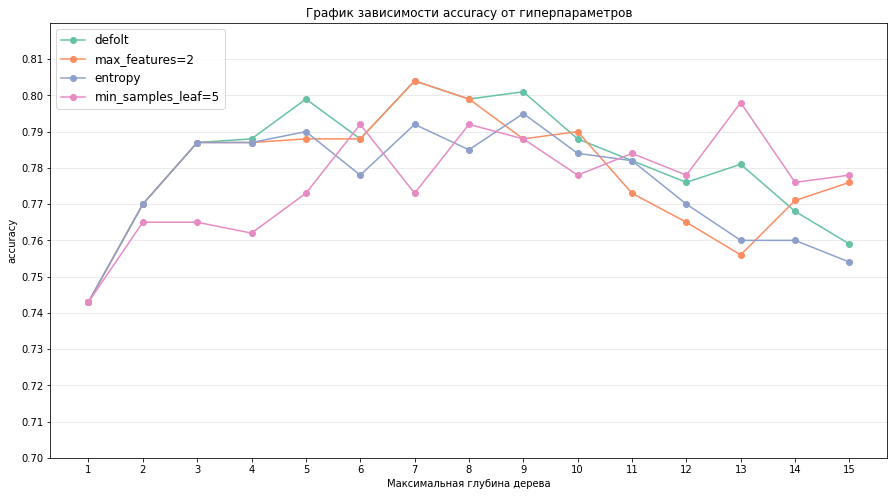

In [22]:
sns.set_palette("Set2")
fig = plt.subplots(figsize=(15,8))

graph(**model_t_1[0])
graph(**model_t_2[0])
graph(**model_t_3[0])
graph(**model_t_4[0])

plt.ylim(0.70, 0.82)
plt.yticks(np.arange(0.70, 0.82, 0.01))
labels = ['defolt', 'max_features=2', 'entropy', 'min_samples_leaf=5']
plt.legend(labels, fontsize=12);
plt.title('График зависимости accuracy от гиперпараметров');

In [23]:
accuracy(model_t_1[1])
accuracy(model_t_2[1])
accuracy(model_t_3[1])
accuracy(model_t_4[1])

- У модели DecisionTreeClassifier(max_depth=7, random_state=1613)
accuracy:0.804
- У модели DecisionTreeClassifier(max_depth=7, max_features=2, random_state=1613)
accuracy:0.804
- У модели DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=1613)
accuracy:0.7947
- У модели DecisionTreeClassifier(max_depth=13, max_features='sqrt', min_samples_leaf=5,
                       random_state=1613)
accuracy:0.7978


- Лучшие показатели `accuracy` у решающего дерева с гиперпараметрами `max_depth=7, max_features=2` и 
`min_samples_leaf=5, max_depth=7, max_features='sqrt'`
- Сохраним эти две модели

In [24]:
dump(model_t_2[1], 'model_t_1.joblib')
dump(model_t_4[1], 'model_t_2.joblib');

### Случайный лес

Напишем функцию для обучения модели `RandomForestClassifier` с различными гиперпараметрами

In [25]:
def random_forest_classifier(*,max_depth=None, random_state=1613, criterion='gini',
                             max_features=None, max_leaf_nodes=None, min_samples_leaf=1, my_dict):
    """Функция для обучения модели Random Forest Classifier с различными гиперпараметрами
    и сохранения accuracy модели в словаре."""
    
    max_accuracy = 0
    best_model = None
    for est in range(1, 152, 25):
            model = RandomForestClassifier(random_state=random_state, n_estimators=est, 
                                           criterion=criterion, max_features=max_features,
                                           max_leaf_nodes=max_leaf_nodes, min_samples_leaf=min_samples_leaf)
            model.fit(features_train, target_train)
            predictions = model.predict(features_valid)
            accuracy = accuracy_score(target_valid, predictions)
            my_dict[str(est)] = accuracy.round(3)
            if accuracy > max_accuracy:
                max_accuracy = accuracy
                best_model = model   
    return(my_dict, best_model)

Объявим пустые словари

In [26]:
my_dict_5 = {}
my_dict_6 = {}
my_dict_7 = {}
my_dict_8 = {}

Сохраним результаты работы функции в переменные

In [27]:
model_f_1 = random_forest_classifier(random_state=1613, my_dict=my_dict_5)
model_f_2 = random_forest_classifier(random_state=1613, my_dict=my_dict_6, min_samples_leaf=5)
model_f_3 = random_forest_classifier(random_state=1613, my_dict=my_dict_7, criterion='entropy')
model_f_4 = random_forest_classifier(random_state=1613, my_dict=my_dict_8, min_samples_leaf=5, criterion='entropy')

In [28]:
accuracy(model_f_1[1])

- У модели RandomForestClassifier(max_features=None, n_estimators=51, random_state=1613)
accuracy:0.8025


Построим графики зависимости `accuracy` от количества деревьев с различными гиперпараметрами

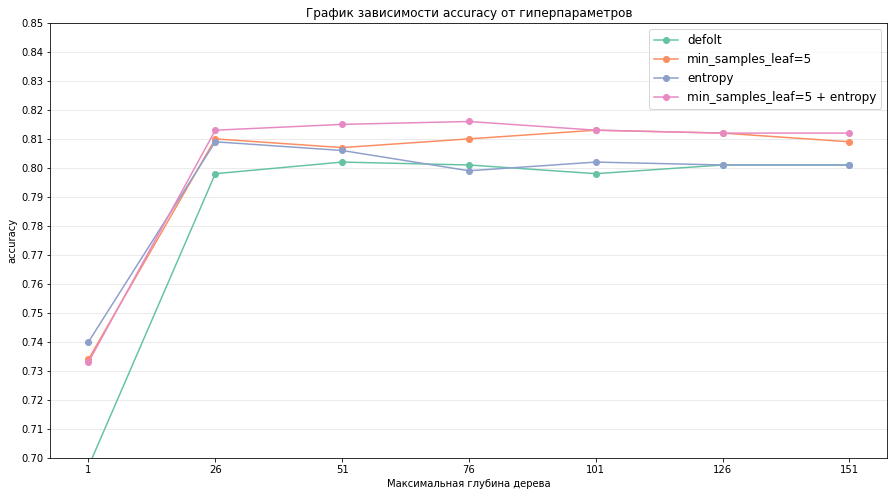

In [29]:
sns.set_palette("Set2")
fig = plt.subplots(figsize=(15,8))

graph(**model_f_1[0])
graph(**model_f_2[0])
graph(**model_f_3[0])
graph(**model_f_4[0])

plt.ylim(0.70, 0.85)
plt.yticks(np.arange(0.70, 0.85, 0.01))
labels = ['defolt', 'min_samples_leaf=5', 'entropy', 'min_samples_leaf=5 + entropy']
plt.legend(labels, fontsize=12);
plt.title('График зависимости accuracy от гиперпараметров');

In [30]:
accuracy(model_f_1[1])
accuracy(model_f_2[1])
accuracy(model_f_3[1])
accuracy(model_f_4[1])

- У модели RandomForestClassifier(max_features=None, n_estimators=51, random_state=1613)
accuracy:0.8025
- У модели RandomForestClassifier(max_features=None, min_samples_leaf=5, n_estimators=101,
                       random_state=1613)
accuracy:0.8134
- У модели RandomForestClassifier(criterion='entropy', max_features=None, n_estimators=26,
                       random_state=1613)
accuracy:0.8087
- У модели RandomForestClassifier(criterion='entropy', max_features=None,
                       min_samples_leaf=5, n_estimators=76, random_state=1613)
accuracy:0.8165


Для подбора оптимальных гиперпараметров из широкого диапазона значений для `RandomForestClassifier` можно воспользоваться рандомизированным поиском `RandomizedSearchCV`

Определим модель и геперпараметры, которые нужно настроить

In [31]:
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_depth': [None, 5, 7, 10, 30],
    'min_samples_leaf': [1, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10, 25],
    'criterion' : ['gini', 'entropy'],
    'random_state': [1613]
}

Запустим случайный поиск

In [32]:
search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring='accuracy')

In [33]:
search.fit(features_train, target_train);

Выведем лучшее 

In [34]:
print(f'Лучшее accuracy: {search.best_score_}')
print(f'Лучшие параметры: {search.best_params_}')

Лучшее accuracy: 0.8044573043536773
Лучшие параметры: {'random_state': 1613, 'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}


In [38]:
model = search.best_estimator_

In [39]:
predictions = model.predict(features_valid)

In [40]:
accuracy_score(target_valid, predictions)

0.8087091757387247

Сохраним модель наиболее удачную из 4 опробованных и модель с гиперпараметрами, подобранными с помощью случайного поиска

In [41]:
dump(model_f_2[1], 'model_f_1.joblib')
dump(model, 'model_f_2.joblib');

### Логистическая регрессия

Попробуем несколько наборов гиперпараметров при обучении модели логистической регрессии

In [42]:
model = LogisticRegression(random_state=1613, solver='liblinear', max_iter=10000, class_weight=None)
model.fit(features_train, target_train)
predictions = model.predict(features_valid)

In [43]:
model.score(features_valid, target_valid)

0.744945567651633

Попробуем другой набор гиперпараметров

In [44]:
model = LogisticRegression(random_state=1613, solver='lbfgs', max_iter=10000, class_weight={0:2, 1:1})
model.fit(features_train, target_train)
predictions = model.predict(features_valid)

In [45]:
model.score(features_valid, target_valid)

0.7231726283048211

In [46]:
dump(model, 'model_l_1.joblib');

И еще один

In [47]:
model = LogisticRegression(random_state=1613, solver='liblinear', max_iter=10000, class_weight=None, penalty='l1')
model.fit(features_train, target_train)
predictions = model.predict(features_valid)


In [48]:
model.score(features_valid, target_valid)

0.744945567651633

In [49]:
dump(model, 'model_l_2.joblib');

### Промежуточный вывод

Мы протестировали три модели для решения задач классификации с несколькими наборами гиперпараметров и выбрали наборы достигшие наибольшего качества.

 - Решающее дерево
    - Модели со стандартным значением `max_features` имеют наилучшие показатели accuracy на максимальной глубине дерева равной 3, дальше они начинают переобучаться. 
    - Модели со значеним max_features равным sqrt или 2 достигают максимума accuracy на глубине равной 7, и только потом начинают переобучаться
    - Абсолютное влияение на качество модели оказывает выбор максимальной глубины.
    - Значительного эффекта от изменения остальных гиперпараметров достичь не удалось - между "лучшим" и "худшим" набором гиперпараметров с оптимальным значением глубины разница около 0.01.
 - Случайный лес
     - Наибольшее влияние оказывает достаточно высокое значение максимального количества деревьев, между показателем `accuracy` при 1 дереве в лесу и при 26 разница около 0.08, однако, между 26 и 151 деревом разница уже максимум 0.02
     - Мы воспользовались функцией `RandomizedSearchCV` для подбора оптимального сочетания гиперпараметров, прирост при использовании найденного набора составил около 0.01
 - Логистическая регрессия
     - С тремя разными испробованными наборами гиперпараметров логистическая регрессия значительно уступает двум другим моделям по показателю `accuracy`
     - Максимум `accuracy`, которого удалось достичь 0.7496.

## Проверьте модель на тестовой выборке

### Проверим модели решающего дерева

Напишем функцию для тестирования моделей

In [50]:
def test(joblib):
    name = str(joblib)
    model = load(joblib)
    predictions = model.predict(features_test)
    print(f'- accuracy {name}\nна тестовой выборке: {model.score(features_test, target_test).round(4)}')
    print('')
    

Создадим список с нашими моделями

In [51]:
best_model = ['model_t_1.joblib', 'model_t_2.joblib', 'model_f_1.joblib',
              'model_f_2.joblib', 'model_l_1.joblib', 'model_l_2.joblib']

Запустим цикл тестирования на тестовой выборке моделей из нашего списка

In [52]:
for model in best_model:
    test(model)

- accuracy model_t_1.joblib
на тестовой выборке: 0.8072

- accuracy model_t_2.joblib
на тестовой выборке: 0.7838

- accuracy model_f_1.joblib
на тестовой выборке: 0.8149

- accuracy model_f_2.joblib
на тестовой выборке: 0.8118

- accuracy model_l_1.joblib
на тестовой выборке: 0.7325

- accuracy model_l_2.joblib
на тестовой выборке: 0.7481



На тестовой выборке наилучшее `accuracy` продемонстрировали модели:
  - DecisionTreeClassifier(max_depth=7, max_features=2, random_state=1613), accuracy = 0.8103
  - RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2', 
   min_samples_leaf=3, min_samples_split=10, random_state=1613) accuracy = 0.8243

## (бонус) Проверьте модели на адекватность

Проверим наши модели на другие метрики:
  - `precision` процент верно предсказанных обладателей подписки smart
  - `recall` процент верно предсказанных обладателей подписки ultra

Напишем функцию для вывода значений основных метрик для наших моделей

In [53]:
def full_test(joblib):
    name = str(joblib)
    model = load(joblib)
    predictions = model.predict(features_test)
    accuracy = accuracy_score(target_test, predictions)
    precision = precision_score(target_test, predictions)
    recall = recall_score(target_test, predictions)

    print(f'- {name} на тестовой выборке имеет следующие показатели:\n\
    accuracy: {accuracy},\
    precision: {precision},\
    recall: {recall}\n ')

Выведем их

In [54]:
for model in best_model:
    full_test(model)

- model_t_1.joblib на тестовой выборке имеет следующие показатели:
    accuracy: 0.807153965785381,    precision: 0.7588652482269503,    recall: 0.5431472081218274
 
- model_t_2.joblib на тестовой выборке имеет следующие показатели:
    accuracy: 0.7838258164852255,    precision: 0.68125,    recall: 0.5532994923857868
 
- model_f_1.joblib на тестовой выборке имеет следующие показатели:
    accuracy: 0.8149300155520995,    precision: 0.75,    recall: 0.5939086294416244
 
- model_f_2.joblib на тестовой выборке имеет следующие показатели:
    accuracy: 0.8118195956454122,    precision: 0.7602739726027398,    recall: 0.5634517766497462
 
- model_l_1.joblib на тестовой выборке имеет следующие показатели:
    accuracy: 0.7325038880248833,    precision: 0.9629629629629629,    recall: 0.1319796954314721
 
- model_l_2.joblib на тестовой выборке имеет следующие показатели:
    accuracy: 0.7480559875583204,    precision: 0.8181818181818182,    recall: 0.22842639593908629
 


Построим тепловую карту для матрицы ошибок
   - Количество верно предсказанных отрицательных классов (True Negative, TN). Это верно предсказанные обладатели подписки **smart**
   - Количество неверно предсказанных положительных классов (False Positive, FP). Это неверно предсказанные обладатели подписки **ultra**
   - Количество неверно предсказанных отрицательных классов (False Negative, FN). Это неверно предсказанные обладатели подписки **smart** 
   - Количество верно предсказанных положительных классов (True Positive, TP). Это верно предсказанные обладатели подписки **ultra**


In [55]:
confusions = []
values = []

In [56]:
def confusion(joblib):
    name = str(joblib)
    model = load(joblib)
    predictions = model.predict(features_test)
    confusions.append(confusion_matrix(predictions, target_test))

In [57]:
for model in best_model:
    confusion(model)

In [58]:
for value in confusions:
    values.append([value[0][0], value[1][0], value[0][1], value[1][1]])

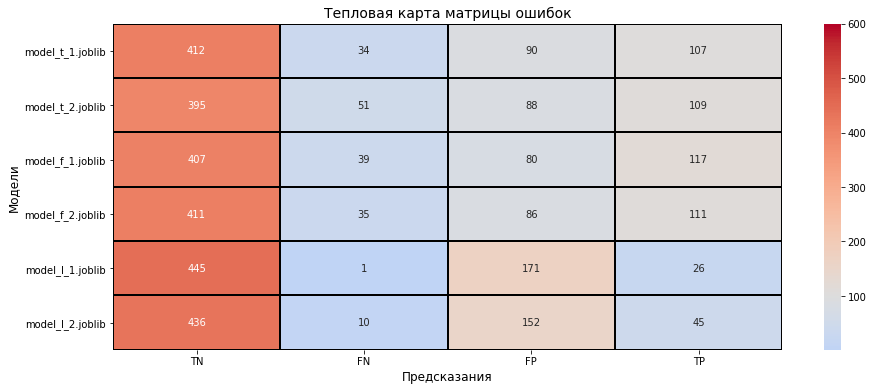

In [59]:
fig= plt.subplots(figsize=(15, 6))
sns.heatmap(values,fmt='d', annot=True, xticklabels=['TN', 'FN', 'FP', 'TP'],
            yticklabels=best_model, cmap='coolwarm', center=100, vmax=600, linewidths=1, linecolor='black')
plt.title('Тепловая карта матрицы ошибок', size=14)
plt.xlabel('Предсказания', size=12)
plt.ylabel('Модели', size=12);

- Лучший показатель `recall` которого удалось добиться - 0.53
- Лучшая наша модель по соотношению трех метрик 
```
    RandomForestClassifier(max_features=None, min_samples_leaf=5, n_estimators=51)
```

## Вывод

- Мы загрузили данные и получили общую информацию о них:
  + Изучили объекты и признаки представленные в датафрейме
  + Определили что выборка несбалансирована
  + Убедились что данные предобработаны
- Разбили данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1
- Обучили и исследовали 3 модели для задачи классификации:
  + Для решающего дерева было выявлено, что наибольшее влияние оказывает глубина дерева, а максимальное значние `accuracy` достигается при глубине равной 7 для моделей с max_features равным sqrt или 2. 
  + В случае случайного леса наибольшее влияние оказывает количество деревьев, однако разница в показателе accuracy между разными значениями достигает максимум 0.08. Также опробовали метод случайного поиска оптимальных гиперпараметров.
  + Логистическая регрессия показала значительно более низкое значение accuracy, достигнув максимума в 0.7496.
- Проверили модель на тестовой выборке, максимальное значение `accuracy` продемонстрировали модели
  + ```DecisionTreeClassifier(max_depth=7, max_features=2, random_state=1613)``` c `accuracy` = **0.8103**
  + ```RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2', min_samples_leaf=3, min_samples_split=10, random_state=1613)``` c `accuracy` = **0.8243**
- Оценили результаты модели с помощью метрик `precision` и `recall`, а также матрицы ошибок
  + Лучшая модель  ```RandomForestClassifier``` с параметрами ```max_features=None, min_samples_leaf=5, n_estimators=51``` имеет следующие значения метрик: 
      - accuracy: 0.8242612752721618
      - precision: 0.8145161290322581
      - recall: 0.528795811518324
    
 Мы использовали не все модели для задач классификации, а также почти не прибегали к автоматическим методам подбора оптимальных гиперпараметров. Также мы не балансировали выборку. Все это ,скорее всего, могло бы повысить эффективность машинного обучения в анализе поведения пользователей и предсказания наиболее подходящего им тарифа.
 
Метрика `accuracy` не только не является исчерпывающем критерием качества модели, но и не дает возможности делать вывод о вменяемости модели. Из-за чего можно абсолютно неработающую модель принять за качественную.

Тем не менее, задачу проекта мы выполнили, достигнув `accuracy` значения 0.82